In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# Carregando o conjunto de dados
tips = sns.load_dataset('tips')

In [3]:
# Calculando a conta líquida
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [4]:
# Ajustando o modelo de regressão linear
model = smf.ols('tip ~ net_bill', data=tips).fit()

In [5]:
# Exibindo o resumo do modelo
print("Resumo do modelo para 'tip' vs. 'net_bill':")
print(model.summary())

Resumo do modelo para 'tip' vs. 'net_bill':
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           5.02e-23
Time:                        15:39:37   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

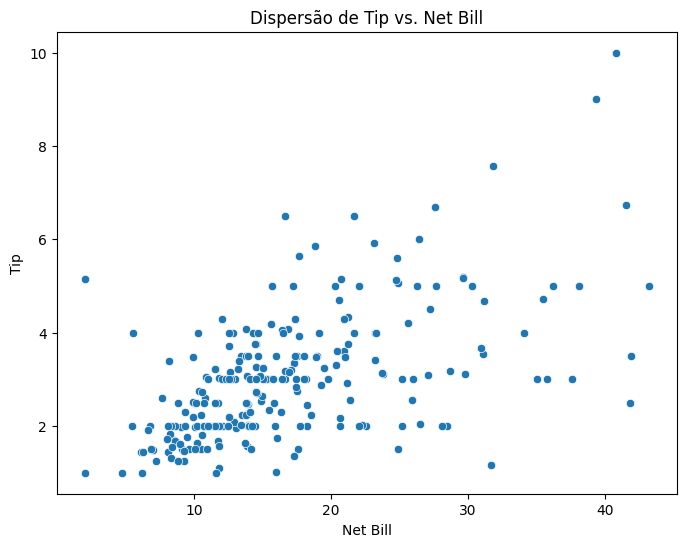

In [6]:
# Criando o gráfico de dispersão para tip vs. net_bill
plt.figure(figsize=(8, 6))
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.title('Dispersão de Tip vs. Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Tip')
plt.show()

In [7]:
# Calculando o percentual da gorjeta
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100

In [8]:
# Ajustando o modelo de regressão linear para tip_pct vs. net_bill
model_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

In [9]:
# Exibindo o resumo do modelo
print("Resumo do modelo para 'tip_pct' vs. 'net_bill':")
print(model_tip_pct.summary())

Resumo do modelo para 'tip_pct' vs. 'net_bill':
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.21e-12
Time:                        15:39:46   Log-Likelihood:                -761.73
No. Observations:                 244   AIC:                             1527.
Df Residuals:                     242   BIC:                             1534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Inte

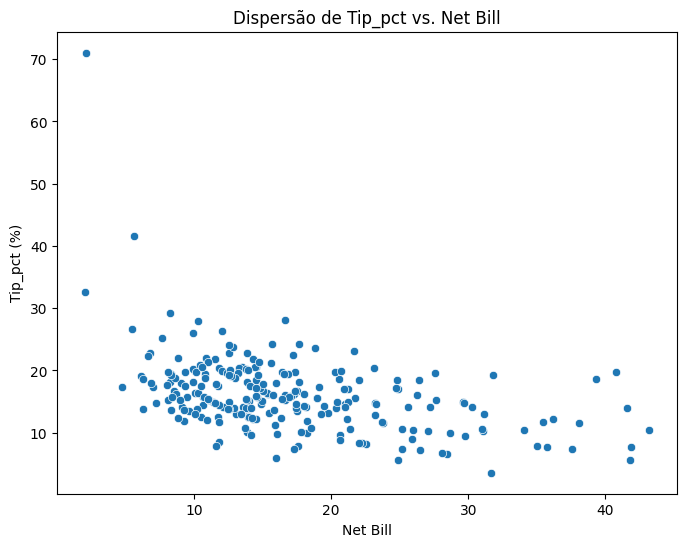

In [10]:
# Criando o gráfico de dispersão para tip_pct vs. net_bill
plt.figure(figsize=(8, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.title('Dispersão de Tip_pct vs. Net Bill')
plt.xlabel('Net Bill')
plt.ylabel('Tip_pct (%)')
plt.show()

In [11]:
# Adicionando os valores preditos ao DataFrame
tips['pred'] = model_tip_pct.fittedvalues

In [12]:
# Calculando o valor da gorjeta previsto a partir dos valores preditos
tips['tip_pred'] = tips['pred'] * tips['total_bill'] / 100

In [13]:
# Exibindo as primeiras linhas das colunas tip_pct e pred
print(tips[['tip_pct', 'pred']].head())

     tip_pct       pred
0   5.944673  16.346938
1  16.054159  18.757296
2  16.658734  15.841753
3  13.978041  14.897421
4  14.680765  14.696007


In [14]:
# Exibindo as primeiras linhas das colunas tip e tip_pred
print(tips[['tip', 'tip_pred']].head())

    tip  tip_pred
0  1.01  2.777345
1  1.66  1.939504
2  3.50  3.328352
3  3.31  3.527709
4  3.61  3.613748


In [15]:
# Calculando o R² do modelo para tip
r2_tip = r2_score(tips['tip'], tips['tip_pred'])